## install & load packages

In [2]:
!pip -q install git+https://github.com/mwshinn/PyDDM
import pyddm
import pyddm.plot
%matplotlib inline
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyddm import Sample
import re

# null model: starting point as a uniform distribution

In [ ]:
def uniform(a, b, x):
    return 1 / (b-a)

Output()

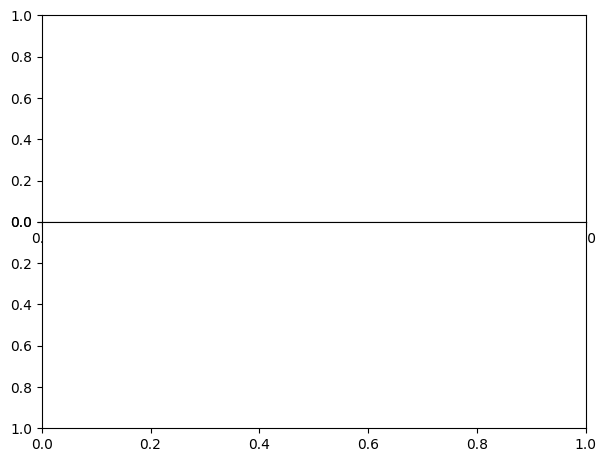

In [10]:
# specify model
model = pyddm.gddm(
    starting_position = lambda x, a, b: uniform(a, b, x),
    bound="B",
    T_dur = 4.1,
    nondecision='ndt',
    parameters={'B': (0.5, 15), 'ndt': (0.01,1.5), 'a': (-1, 0), 'b': (0, 1)},
    conditions = ['trueCongruence'])

pyddm.plot.model_gui_jupyter(model, data_dt=0.05, conditions={'trueCongruence':['congruent', 'incongruent', 'neutral']})

## cookbook example: normal distribution

In [12]:
m = pyddm.gddm(starting_position= lambda mu,sigma,x: scipy.stats.norm(mu,sigma).pdf(x),
               parameters={"mu": (-.5, .5), "sigma": (.01, .3)})

pyddm.plot.model_gui_jupyter(m)

Output()

In [37]:
def start_point(x, loc, scale, loc50, scale50, trueCongruence):
  if trueCongruence == 'congruent':
    return scipy.stats.uniform(loc,scale).pdf(x)
  elif trueCongruence == 'incongruent':
    return scipy.stats.uniform(-loc,scale).pdf(x)
  else:
    return scipy.stats.uniform(loc50,scale50).pdf(x)

m = pyddm.gddm(starting_position= start_point,
               parameters={"loc": (-.5, .5), "scale": (0.01, 0.49),
                           "loc50": (-.5, .5), "scale50": (0.01, 0.49)},
               conditions = {"trueCongruence": ['congruent', 'incongruent', 'neutral']})

pyddm.plot.model_gui_jupyter(m, conditions = {'trueCongruence':['congruent', 'incongruent', 'neutral']})

Output()